In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Read the London OD Data
data = pd.read_csv('london_flows.csv')

# Create a weighted graph from the DataFrame
G = nx.from_pandas_edgelist(data, 'station_origin', 'station_destination', ['flows'], create_using=nx.Graph())


In [3]:
# Function to calculate connectivity
def connectivity(G):
    conn = nx.average_degree_connectivity(G)
    return sum(conn.values()) / len(conn)

In [4]:
# Function to calculate global efficiency
def global_efficiency(G):
    return nx.global_efficiency(G)

In [5]:
# Function to perform non-sequential node removal
def non_sequential_removal(G, centrality_measure):
    centralities = centrality_measure(G)
    sorted_centralities = sorted(centralities.items(), key=lambda x: x[1], reverse=True)
    removed_nodes = []
    impacts = []

    for i in range(10):
        G.remove_node(sorted_centralities[i][0])
        removed_nodes.append(sorted_centralities[i][0])
        impacts.append((connectivity(G), global_efficiency(G)))

    return removed_nodes, impacts


In [6]:
# Function to perform sequential node removal
def sequential_removal(G, centrality_measure):
    removed_nodes = []
    impacts = []

    for i in range(10):
        centralities = centrality_measure(G)
        sorted_centralities = sorted(centralities.items(), key=lambda x: x[1], reverse=True)
        G.remove_node(sorted_centralities[0][0])
        removed_nodes.append(sorted_centralities[0][0])
        impacts.append((connectivity(G), global_efficiency(G)))

    return removed_nodes, impacts

In [7]:
# Perform non-sequential and sequential node removal for each centrality measure
centrality_measures = [nx.degree_centrality, nx.betweenness_centrality, nx.closeness_centrality]
centrality_labels = ['Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality']

for i, measure in enumerate(centrality_measures):
    G_copy = G.copy()
    removed_nodes_ns, impacts_ns = non_sequential_removal(G_copy, measure)
    G_copy = G.copy()
    removed_nodes_s, impacts_s = sequential_removal(G_copy, measure)

In [8]:
# Print removed nodes
print(f'{centrality_labels[i]}:')
print('Non-Sequential Removal - Removed Nodes:', removed_nodes_ns)
print('Sequential Removal - Removed Nodes:', removed_nodes_s)

Closeness Centrality:
Non-Sequential Removal - Removed Nodes: ['Stratford', 'Highbury & Islington', 'Whitechapel', 'West Brompton', 'Canada Water', 'Bank and Monument', 'Canary Wharf', 'Richmond', 'Canning Town', 'Liverpool Street']
Sequential Removal - Removed Nodes: ['Stratford', 'Highbury & Islington', 'Whitechapel', 'West Brompton', 'Canada Water', 'Bank and Monument', 'Canary Wharf', 'Richmond', 'Canning Town', 'Liverpool Street']


In [9]:
# Print impact measures
print("Impact Measures:")
for i, measure in enumerate(centrality_measures):
    G_copy = G.copy()
    removed_nodes_ns, impacts_ns = non_sequential_removal(G_copy, measure)
    print(f"Non-Sequential - {centrality_labels[i]}:")
    print([impact[0] for impact in impacts_ns])
    print([impact[1] for impact in impacts_ns])

Impact Measures:
Non-Sequential - Degree Centrality:
[188.48321159014256, 187.52121315000204, 187.0469038853807, 185.1850880344565, 184.00193511740372, 180.4211667366707, 180.70875458587733, 179.3026631314939, 177.46465388091414, 175.72816598092868]
[0.6922057812149586, 0.6911262074989025, 0.6901184844221805, 0.6891173509819285, 0.6881358632239161, 0.6852010524310151, 0.6746346364631163, 0.6735147659954192, 0.672438204468887, 0.6693813549587768]
Non-Sequential - Betweenness Centrality:
[188.48321159014256, 187.83547068148852, 187.50902689066294, 185.97763863655976, 184.04439543362597, 183.79765853993138, 181.5146041469034, 179.68578350938702, 179.04394174442928, 178.16086433418485]
[0.6922057812149586, 0.6818256027952448, 0.680832587478027, 0.6797500481910923, 0.6767864446767804, 0.6564978535940833, 0.6552638446680241, 0.6540883555203036, 0.650970272229606, 0.5876284242792604]
Non-Sequential - Closeness Centrality:
[188.48321159014256, 187.52121315000204, 187.0469038853807, 185.1850880

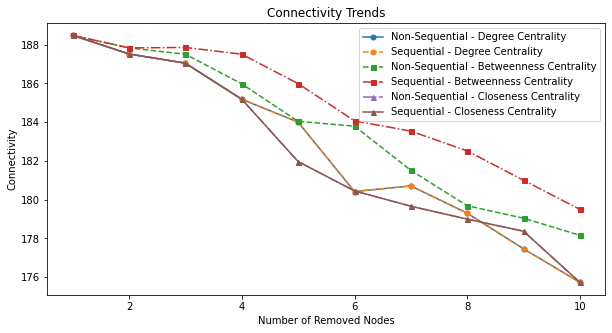

In [13]:
# Plot connectivity results
plt.figure(figsize=(10, 5))
markers = ['o', 's', '^']
linestyles = ['-', '--', '-.']

for i, measure in enumerate(centrality_measures):
    G_copy = G.copy()
    removed_nodes_ns, impacts_ns = non_sequential_removal(G_copy, measure)
    G_copy = G.copy()
    removed_nodes_s, impacts_s = sequential_removal(G_copy, measure)

    plt.plot(range(1, 11), [impact[0] for impact in impacts_ns], label=f'Non-Sequential - {centrality_labels[i]}', marker=markers[i], linestyle=linestyles[i], markersize=5)
    plt.plot(range(1, 11), [impact[0] for impact in impacts_s], label=f'Sequential - {centrality_labels[i]}', marker=markers[i], linestyle=linestyles[(i+1)%3], markersize=5)

plt.xlabel('Number of Removed Nodes')
plt.ylabel('Connectivity')
plt.title('Connectivity Trends')
plt.legend()
plt.show()

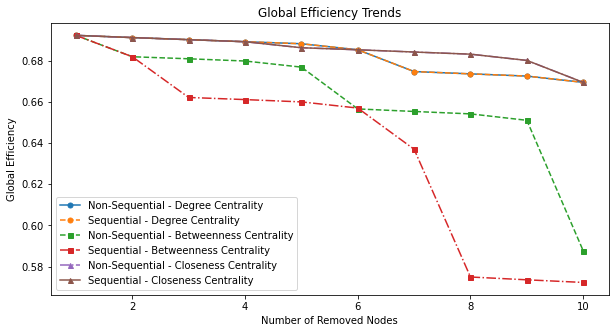

In [14]:
# Plot global efficiency results
plt.figure(figsize=(10, 5))

for i, measure in enumerate(centrality_measures):
    G_copy = G.copy()
    removed_nodes_ns, impacts_ns = non_sequential_removal(G_copy, measure)
    G_copy = G.copy()
    removed_nodes_s, impacts_s = sequential_removal(G_copy, measure)

    plt.plot(range(1, 11), [impact[1] for impact in impacts_ns], label=f'Non-Sequential - {centrality_labels[i]}', marker=markers[i], linestyle=linestyles[i], markersize=5)
    plt.plot(range(1, 11), [impact[1] for impact in impacts_s], label=f'Sequential - {centrality_labels[i]}', marker=markers[i], linestyle=linestyles[(i+1)%3], markersize=5)

plt.xlabel('Number of Removed Nodes')
plt.ylabel('Global Efficiency')
plt.title('Global Efficiency Trends')
plt.legend()
plt.show()

In [16]:
# Create an empty DataFrame for non-sequential results
results_ns = pd.DataFrame(columns=['Centrality Measure', 'Node Rank', 'Removed Node', 'Connectivity', 'Global Efficiency'])

# Fill the DataFrame with non-sequential results
for i, measure in enumerate(centrality_measures):
    G_copy = G.copy()
    removed_nodes_ns, impacts_ns = non_sequential_removal(G_copy, measure)
    
    for rank, (node, impact) in enumerate(zip(removed_nodes_ns, impacts_ns), start=1):
        row = pd.DataFrame({
            'Centrality Measure': centrality_labels[i],
            'Node Rank': rank,
            'Removed Node': node,
            'Connectivity': impact[0],
            'Global Efficiency': impact[1]
        }, index=[0])
        results_ns = pd.concat([results_ns, row], ignore_index=True)

# Create an empty DataFrame for sequential results
results_s = pd.DataFrame(columns=['Centrality Measure', 'Node Rank', 'Removed Node', 'Connectivity', 'Global Efficiency'])

# Fill the DataFrame with sequential results
for i, measure in enumerate(centrality_measures):
    G_copy = G.copy()
    removed_nodes_s, impacts_s = sequential_removal(G_copy, measure)
    
    for rank, (node, impact) in enumerate(zip(removed_nodes_s, impacts_s), start=1):
        row = pd.DataFrame({
            'Centrality Measure': centrality_labels[i],
            'Node Rank': rank,
            'Removed Node': node,
            'Connectivity': impact[0],
            'Global Efficiency': impact[1]
        }, index=[0])
        results_s = pd.concat([results_s, row], ignore_index=True)

# Display the non-sequential results table
print("Non-Sequential Node Removal Results:")
display(results_ns)

# Display the sequential results table
print("Sequential Node Removal Results:")
display(results_s)

Non-Sequential Node Removal Results:


,Centrality Measure,Node Rank,Removed Node,Connectivity,Global Efficiency
0,Degree Centrality,1,Stratford,188.483212,0.692206
1,Degree Centrality,2,Highbury & Islington,187.521213,0.691126
2,Degree Centrality,3,Whitechapel,187.046904,0.690118
3,Degree Centrality,4,West Brompton,185.185088,0.689117
4,Degree Centrality,5,Canary Wharf,184.001935,0.688136
5,Degree Centrality,6,Canada Water,180.421167,0.685201
6,Degree Centrality,7,Liverpool Street,180.708755,0.674635
7,Degree Centrality,8,Bank and Monument,179.302663,0.673515
8,Degree Centrality,9,Richmond,177.464654,0.672438
9,Degree Centrality,10,Canning Town,175.728166,0.669381


Sequential Node Removal Results:


,Centrality Measure,Node Rank,Removed Node,Connectivity,Global Efficiency
0,Degree Centrality,1,Stratford,188.483212,0.692206
1,Degree Centrality,2,Highbury & Islington,187.521213,0.691126
2,Degree Centrality,3,Whitechapel,187.046904,0.690118
3,Degree Centrality,4,West Brompton,185.185088,0.689117
4,Degree Centrality,5,Canary Wharf,184.001935,0.688136
5,Degree Centrality,6,Canada Water,180.421167,0.685201
6,Degree Centrality,7,Liverpool Street,180.708755,0.674635
7,Degree Centrality,8,Bank and Monument,179.302663,0.673515
8,Degree Centrality,9,Richmond,177.464654,0.672438
9,Degree Centrality,10,Canning Town,175.728166,0.669381
